# Case Study Spark Funds

<b>Importing all the required Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
# Installing charamel developed by user Vladislav Blinov aka chomechome in Github
# https://github.com/chomechome/charamel
!pip install charamel
from charamel import Detector

<b>Finding out the encoding format for the given files</b>

In [2]:
# Using Chardet to find out the encoding for 'companies.csv' file
with open('companies.csv', 'rb') as rawdata:
    result=chardet.detect(rawdata.read())
    
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}


<u>Chardet showing low confidence in 'Windows-1254'</u>

In [3]:
# Alternatively using charamel to find out the encoding for 'companies.csv' file
detector = Detector()
content = 'companies.csv'
detector.probe(content)

[(<Encoding.CP_1006: 'cp1006'>, 0.9521461826551444),
 (<Encoding.CP_864: 'cp864'>, 0.9462450387005286),
 (<Encoding.UTF_7: 'utf_7'>, 0.9452766125829656)]

<u>charamel showing highest confidence in 'cp1006'</u>

In [4]:
# Using Chardet to find out the encoding for 'rounds2.csv' file
with open('rounds2.csv', 'rb')as rawdata2:
    result2=chardet.detect(rawdata2.read())
    
print(result2)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


<u>Chardet showing low confidence in 'Windows-1254'</u>

In [5]:
# Alternatively using charamel to find out the encoding for 'rounds2.csv' file
detector = Detector()
content2 = 'rounds2.csv'
detector.probe(content2)

[(<Encoding.CP_1006: 'cp1006'>, 0.9521461826551444),
 (<Encoding.CP_864: 'cp864'>, 0.9462450387005286),
 (<Encoding.UTF_7: 'utf_7'>, 0.9452766125829656)]

<u>charamel showing highest confidence in 'cp1006'</u>

In [6]:
companies_test = pd.read_csv('companies.csv', encoding ='cp1006')
companies_test.tail(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66365,/Organization/ﺣEron,ﺣERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ﺣAsys-2,ﺣasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/ﺥﺍNovatiff-Reklam-Ve-TanﻛﺎTﻛﺎM-H...,ﺥﺍnovatiff Reklam ve Tanﺥﺎtﺥﺎm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


<b><u>Although charamel is giving 95% confidence for CP_1006 encoding format but when using this we have to deal with certain special characters in Arabic/Urdu which needs to be rectified , so to bypass this step i am going with palmos.</u></b>

<b>Reading the companies.csv file</b>

In [7]:
companies = pd.read_csv('companies.csv', encoding ='palmos')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [8]:
#checking for null values in the dataframe
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [9]:
#checking the null values in term of percentage
round(100*(companies.isnull().sum()/len(companies.index)),2)

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64

<u>Although a lot of value are null in the companies dataframe a whole lot in not required for current analysis</u>

In [10]:
#checking for null values in the permalink column which is our primary key in companies dataframe
companies['permalink'].isnull().sum()

0

# Checkpoint 1

<b>Finding Unique Companies in companies dataframe</b>

In [11]:
companies['permalink'].nunique()

66368

In [12]:
len(companies['permalink'].unique())

66368

Converting all string to lower letter to make it more uniform

In [13]:
companies['permalink'] = companies['permalink'].str.lower()

In [14]:
companies['permalink'].head()

0                    /organization/-fame
1                 /organization/-qounter
2    /organization/-the-one-of-them-inc-
3                  /organization/0-6-com
4         /organization/004-technologies
Name: permalink, dtype: object

<b>Again finding Unique Companies and to check if there are any duplicate values with capital and small letters</b>

In [15]:
len(companies['permalink'].unique())

66368

In [16]:
companies['permalink'].nunique()

66368

In [17]:
companies['permalink'].value_counts(dropna=False)

/organization/triitme-global    1
/organization/venuetastic       1
/organization/atbizz            1
/organization/tyba              1
/organization/jobrangers        1
                               ..
/organization/turbo140          1
/organization/busfor            1
/organization/bluesprig         1
/organization/bookpad-tech      1
/organization/too-me            1
Name: permalink, Length: 66368, dtype: int64

<b>Reading the rounds2.csv file</b>

In [18]:
rounds2 = pd.read_csv('rounds2.csv', encoding ='palmos')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [19]:
#checking for null values in the dataframe
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [20]:
#checking for null values in terms of percentage
round(100*(rounds2.isnull().sum()/len(rounds2.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [21]:
#checking for null values in the company_permalink column which is our primary key for rounds2 dataframe
rounds2['company_permalink'].isnull().sum()

0

<b>Finding Unique Companies in rounds2 dataframe</b>

In [22]:
len(rounds2['company_permalink'].unique())

90247

In [23]:
rounds2['company_permalink'].nunique()

90247

Converting all string to lower letter to make it more uniform

In [24]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [25]:
rounds2['company_permalink'].head()

0                    /organization/-fame
1                 /organization/-qounter
2                 /organization/-qounter
3    /organization/-the-one-of-them-inc-
4                  /organization/0-6-com
Name: company_permalink, dtype: object

<b>Again finding Unique Companies and to check if there are any duplicate values with capital and small letters</b>

In [26]:
len(rounds2['company_permalink'].unique())

66368

In [27]:
rounds2['company_permalink'].nunique()

66368

In [28]:
rounds2['company_permalink'].value_counts(dropna=False)

/organization/solarflare                   19
/organization/quellan                      18
/organization/semprius                     18
/organization/exagen-diagnostics           18
/organization/endogastric-solutions        17
                                           ..
/organization/fantees                       1
/organization/grata                         1
/organization/rabbler                       1
/organization/direct-media-technologies     1
/organization/too-me                        1
Name: company_permalink, Length: 66368, dtype: int64

Sorting the unique values in company_permalink column and permalink column

In [29]:
df = rounds2['company_permalink'].unique()
dfs = np.sort(df)
dfs

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ...,
       '/organization/ã\x81eron', '/organization/ã”asys-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

In [30]:
df2 = companies['permalink'].unique()
dfs2 = np.sort(df2)
dfs2

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ...,
       '/organization/ã\x81eron', '/organization/ã”asys-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

Checking that both numpy array contains the same values

In [31]:
#using array_equal method
np.array_equal([dfs],[dfs2])

True

In [32]:
#using the difference between the arrays it is returns empty array meaning both are the same
print(np.setdiff1d([dfs],[dfs2]))

[]


Some additional cleanup for names column where one company name is null

In [33]:
companies['name'].value_counts(dropna=False)

Karma                     4
Spire                     4
Blink                     4
Roost                     4
#NAME?                    4
                         ..
PATHAR INC                1
DreamSaver Enterprises    1
Kili (Africa)             1
Sapho                     1
NaN                       1
Name: name, Length: 66100, dtype: int64

In [34]:
#Finding the null value in the companies dataframe
companies[companies['name'].isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
56916,/organization/tell-it-in,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


In [35]:
#Filling the company name in the null field
companies['name'] = companies['name'].fillna('tell it in')

In [36]:
#checking for the null value in the name column
companies['name'].isnull().sum()

0

<b>Merging the companies and round2 dataframe into master_frame</b>

In [37]:
#merging the dataframes into master dataframe
master_frame = pd.merge(companies, rounds2 , how='inner', left_on='permalink', right_on='company_permalink')
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [38]:
#checking the shape of the dataframe
master_frame.shape

(114949, 16)

Checking null values in the master_frame

In [39]:
#These are the exact number where the value is null
master_frame.isnull().sum()

permalink                      0
name                           0
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [40]:
#These are the percentage of null values with respect to the number of elemnts in the whole dataframe
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

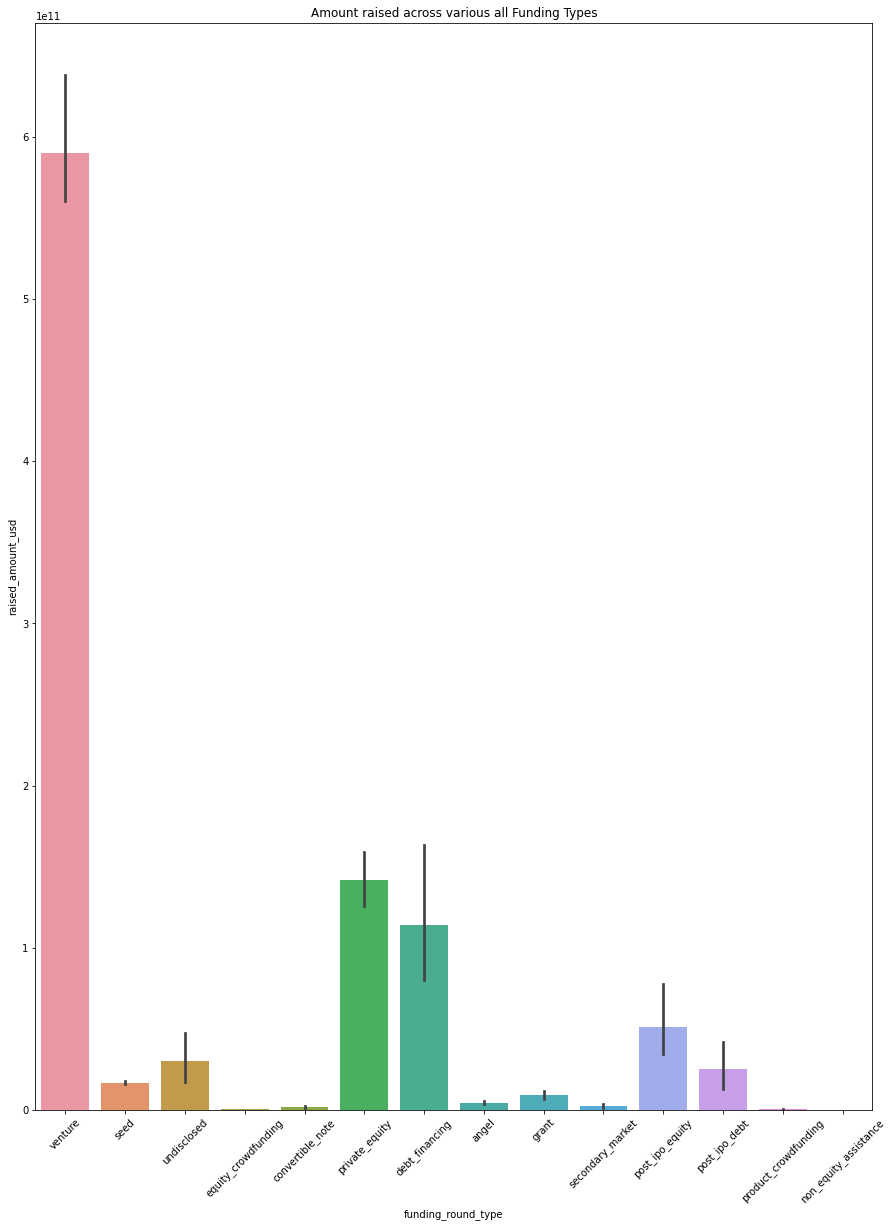

In [41]:
#ploting a barplot which represent the amount of funding the companies has received for each investment type
plt.figure(figsize = (15,20))
plt.title('Amount raised across various all Funding Types')
sns.barplot(x='funding_round_type', y="raised_amount_usd", data=master_frame, estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

# Checkpoint 2

<b>Finding the most representative value for each funding type while filtering the data which are having funding_round_type as venture, private_equity, seed and angel.</b>

In [42]:
#updating the master_frame dataframe having funding_round_type as venture, private_equity, seed and angel.
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type']== 'seed') | (master_frame['funding_round_type']== 'angel') | (master_frame['funding_round_type']== 'private_equity')]
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN


In [43]:
#the most representative value based on median for each funding type will be as follows
master_frame.groupby(by=['funding_round_type']).raised_amount_usd.median()

funding_round_type
angel               400000.0
private_equity    20000000.0
seed                275000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

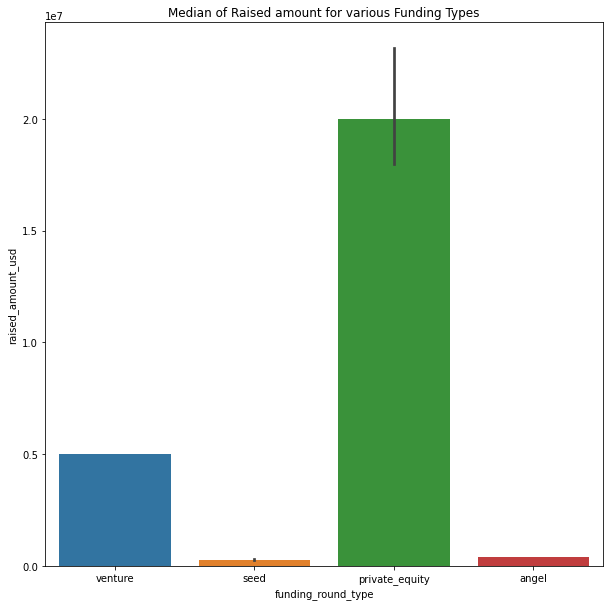

In [44]:
#create a boxplot showing most representative value based on median values
plt.figure(figsize=(10,10))
plt.title('Median of Raised amount for various Funding Types')
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame, estimator=np.median)
plt.show

In [45]:
#the most representative value baseed on mean for each funding type will be as follows
pd.options.display.float_format = "{:.2f}".format
master_frame.groupby(by=['funding_round_type']).raised_amount_usd.mean()

funding_round_type
angel              958694.47
private_equity   73308593.03
seed               719818.00
venture          11748949.13
Name: raised_amount_usd, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

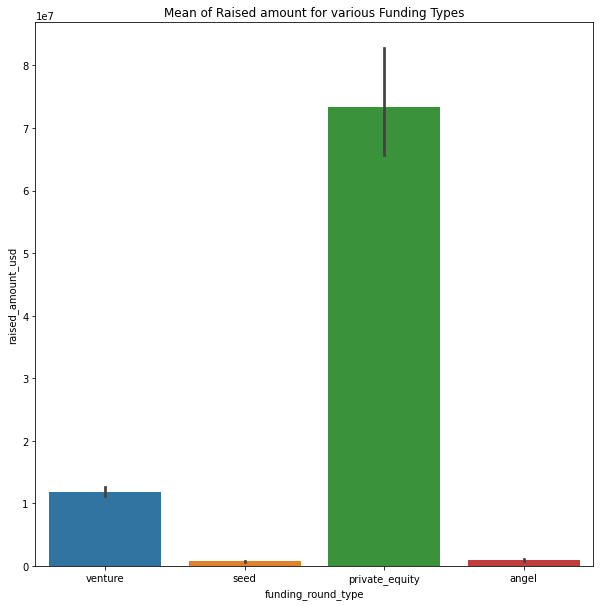

In [46]:
#create a boxplot showing most representative value based on mean values
plt.figure(figsize=(10,10))
plt.title('Mean of Raised amount for various Funding Types')
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame, estimator=np.mean)
plt.show

In [47]:
#using describe to see the mean and median all in one go
master_frame.groupby(by=['funding_round_type']).raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.00,958694.47,7404397.12,0.00,150000.00,400000.00,1000000.00,494511992.00
private_equity,1936.00,73308593.03,198113458.41,0.00,5000000.00,20000000.00,75000000.00,4745460219.00
seed,23603.00,719818.00,2221732.80,0.00,55000.00,275000.00,1000000.00,200000000.00
venture,50228.00,11748949.13,86352066.56,0.00,1600901.75,5000000.00,12000000.00,17600000000.00


In [48]:
#total number of funding received by these 4 funding types
master_frame['funding_round_type'].value_counts()

venture           55494
seed              30524
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64

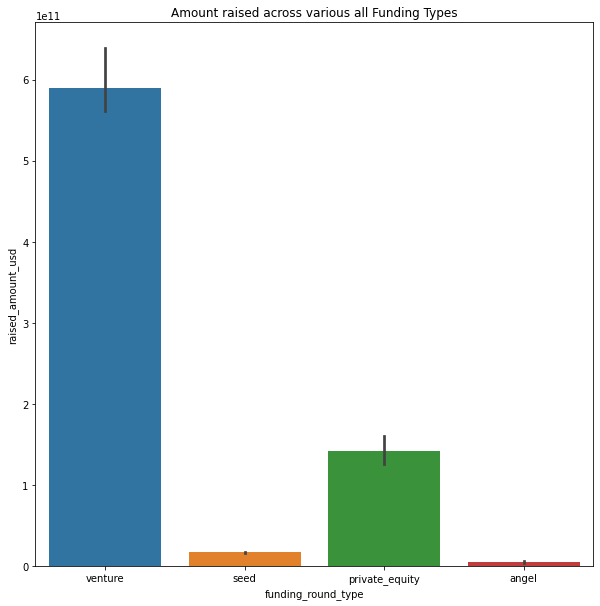

In [49]:
#ploting the barplot on sum of amount of funding received by these 4 funding types
plt.figure(figsize = (10,10))
plt.title('Amount raised across various all Funding Types')
sns.barplot(x='funding_round_type', y="raised_amount_usd", data=master_frame, estimator=np.sum)
plt.show()

<b>If we look at all the graph from above we can see that Venture follows the constraint of Spark Fund i.e. the investment budget is between 5 and 15 million USD. So, we can say that venture is the best investment type for Spark Funds.</b>

Going ahead with Venture as Investment type

In [50]:
#creating a data frame where investment type is only venture
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture')]
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00
114937,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00
114941,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.00


# Checkpoint 3

In [51]:
#changing strings to lower value for having more uniform values
master_frame['name'] = master_frame['name'].str.lower()
master_frame['category_list'] = master_frame['category_list'].str.lower()
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00
5,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/organization/zyrra,zyrra,http://www.zyrra.com,e-commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00
114936,/organization/zystor,zystor,http://www.zystor.com,biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00
114937,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00
114941,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,enterprise software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.00


Finding the top9 most funded countries which are having venture funding type

In [52]:
#creating a grouby countries and summing it
top9 = master_frame.groupby(by=['country_code']).sum()
pd.options.display.float_format = "{:.2f}".format
#sorting the values from most to least and picking top 9 out of it
top9 = top9.sort_values(by='raised_amount_usd', ascending=False).head(9)

In [53]:
top9 = top9.reset_index()
top9

,country_code,raised_amount_usd
0,USA,422510842796.00
1,CHN,39835418773.00
2,GBR,20245627416.00
3,IND,14391858718.00
4,CAN,9583332317.00
5,FRA,7259536732.00
6,ISR,6907514579.00
7,DEU,6346959822.00
8,JPN,3363676611.00


So we can see the top 3 English speaking are USA, Great Britain and India based on most amount raised

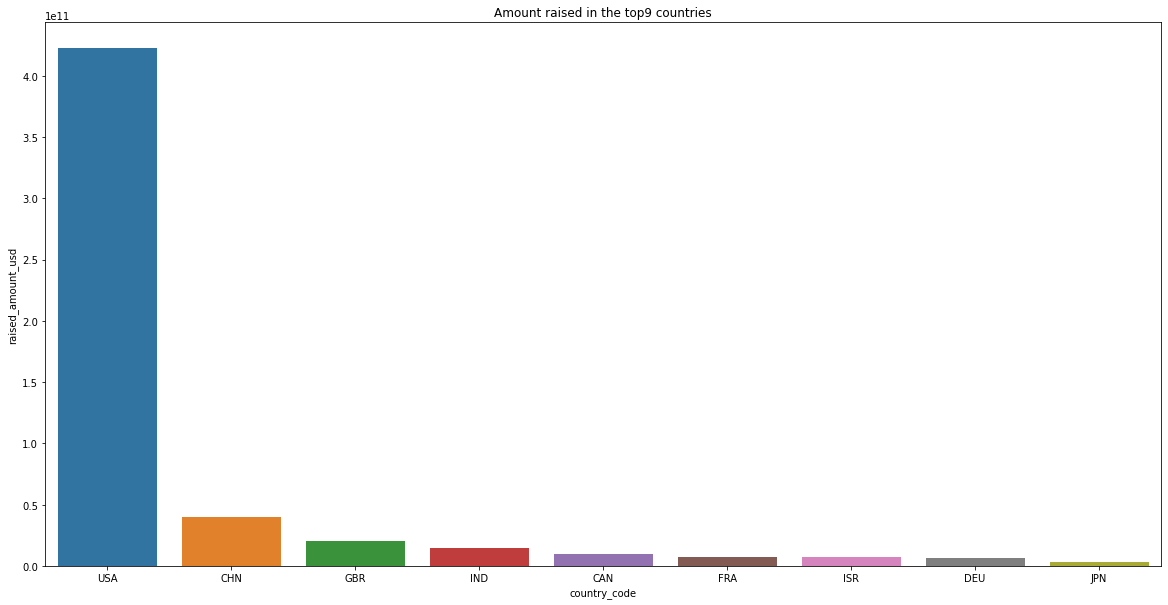

In [54]:
#ploting the graph for top9 countries
plt.figure(figsize=(20,10))
plt.title('Amount raised in the top9 countries')
sns.barplot(x='country_code', y='raised_amount_usd', data=top9)
plt.show()

# Checkpoint 4

Reading the mapping.csv file

In [55]:
#reading the file and creating the dataframe
wide_df = pd.read_csv('mapping.csv')
wide_df

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [56]:
#checking for the null values in the dataframe
wide_df.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [57]:
#removing the null value row from the dataframe
wide_df = wide_df[~(wide_df.Blanks == 1)]
wide_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [58]:
#droping the null value column from the dataframe
wide_df = wide_df.drop('Blanks', axis=1)
wide_df.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [59]:
#Now we need to convert the dataframe from a wide format to a long format
#for that we use melt function which takes the id_vars which is the category_list and the other 
#is value_vars which are the sectors
value_vars = list(wide_df.columns[1:])
value_vars

['Automotive & Sports',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [60]:
id_vars = list(np.setdiff1d(wide_df.columns, value_vars))
id_vars

['category_list']

In [61]:
#using melt function to create the wide format into long format
mapping = pd.melt(wide_df, id_vars = id_vars , value_vars = value_vars)

In [62]:
#selecting only rows which have value = 1 hence mapping the categories with their respective sectors
mapping = mapping[mapping['value'] == 1]
mapping

,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising",1
5426,Social Television,"Social, Finance, Analytics, Advertising",1
5427,Social Travel,"Social, Finance, Analytics, Advertising",1
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [63]:
#dropping the value column
mapping = mapping.drop('value', axis=1)

In [64]:
#renaming the column to main_sector
mapping = mapping.rename(columns = {'variable' : 'main_sector'})
mapping

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [65]:
#sorting the categories
mapping.sort_values(by=['category_list'])

,category_list,main_sector
1157,0notechnology,Cleantech / Semiconductors
1158,0tural Language Processing,Cleantech / Semiconductors
1159,0tural Resources,Cleantech / Semiconductors
3908,0vigation,"News, Search and Messaging"
2748,3D,Manufacturing
...,...,...
4808,Young Adults,Others
4506,iOS,Others
4507,iPad,Others
4508,iPhone,Others


In [66]:
#we can see the 0 is there instead of na so we are replacing them
mapping['category_list']= mapping['category_list'].str.replace('0','Na',regex=True)

In [67]:
mapping.sort_values(by=['category_list'])

,category_list,main_sector
2748,3D,Manufacturing
2749,3D Printing,Manufacturing
2750,3D Technology,Manufacturing
4830,ANalytics,"Social, Finance, Analytics, Advertising"
4812,Accounting,"Social, Finance, Analytics, Advertising"
...,...,...
4808,Young Adults,Others
4506,iOS,Others
4507,iPad,Others
4508,iPhone,Others


In [68]:
#again making the string to lower for uniformality
mapping['category_list'] = mapping['category_list'].str.lower()

In [69]:
mapping.head(10)

,category_list,main_sector
7,adventure travel,Automotive & Sports
13,aerospace,Automotive & Sports
44,auto,Automotive & Sports
45,automated kiosk,Automotive & Sports
46,automotive,Automotive & Sports
56,bicycles,Automotive & Sports
68,boating industry,Automotive & Sports
86,cad,Automotive & Sports
92,cars,Automotive & Sports
187,design,Automotive & Sports


In [70]:
#creating primary sector extracted from category_list column
master_frame['primary_sector'] = master_frame['category_list'].str.split('|').str[0]
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,media
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,application platforms
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,curated web
5,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/organization/zyrra,zyrra,http://www.zyrra.com,e-commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00,e-commerce
114936,/organization/zystor,zystor,http://www.zystor.com,biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00,biotechnology
114937,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00,biotechnology
114941,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,enterprise software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.00,enterprise software


In [71]:
#merging the master_frame dataframe and mapping dataframe
master_frame = pd.merge(master_frame, mapping , how='inner', left_on='primary_sector', right_on='category_list')
master_frame

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,media,media,Entertainment
1,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,media,media,Entertainment
2,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,media,media,Entertainment
3,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,media,media,Entertainment
4,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,media,media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54336,/organization/yapta,yapta,http://www.yapta.com,tracking|transportation|travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.00,tracking,tracking,Others
54337,/organization/yapta,yapta,http://www.yapta.com,tracking|transportation|travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.00,tracking,tracking,Others
54338,/organization/yapta,yapta,http://www.yapta.com,tracking|transportation|travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.00,tracking,tracking,Others
54339,/organization/ziftit,ziftit,http://www.ziftit.com,gift registries|shopping,closed,USA,CA,San Diego,San Diego,01-02-2011,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,NaN,09-07-2013,4000000.00,gift registries,gift registries,Others


# Checkpoint 5

As we already know the top 3 English speaking are USA, Great Britain and India. Thus, we have to create dataframe based on these 3 countries.

<b>D1 = USA with the contraints of investment of venture from 5 to 15 Million</b>

In [72]:
#creating dataframe where country is USA and investment is from 5 to 15 million
D1= master_frame[(master_frame['country_code'] =='USA') & (master_frame['raised_amount_usd']>= 5000000) & (master_frame['raised_amount_usd']<= 15000000)]
D1

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
4,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,media,media,Entertainment
16,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,media|mobile|restaurants|technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.00,media,media,Entertainment
25,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,media|news|publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.00,media,media,Entertainment
26,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,media|news|publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.00,media,media,Entertainment
36,/organization/matchmine,matchmine,http://matchmine.com,media|news|reviews and recommendations,closed,USA,MA,Boston,Needham,01-01-2007,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.00,media,media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54313,/organization/thisnext,thisnext,http://www.thisnext.com,social buying|social media,operating,USA,CA,Los Angeles,Santa Monica,01-12-2005,/organization/thisnext,/funding-round/3ba5a2f756c9754968fc1c1638f4f415,venture,B,01-01-2008,5000000.00,social buying,social buying,"Social, Finance, Analytics, Advertising"
54316,/organization/thredhq,thredhq,https://thredhq.com/,social + mobile + local|social network media,operating,USA,CA,SF Bay Area,Berkeley,01-01-2012,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,A,18-09-2013,5000000.00,social + mobile + local,social + mobile + local,"Social, Finance, Analytics, Advertising"
54326,/organization/user-interface,user interface,http://www.userinterface.com,user interface,operating,USA,CA,Bakersfield,California City,NaN,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,A,24-01-2001,8250000.00,user interface,user interface,Others
54330,/organization/washio,washio,http://www.getwashio.com,service industries,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,A,09-06-2014,10500000.00,service industries,service industries,Others


In [73]:
#checking the number of investment made in USA
D1.shape

(12063, 19)

In [74]:
#checking the total amount raised by companies in USA
D1['raised_amount_usd'].sum()

107757097294.0

In [75]:
#checking the sector wise distribution in USA
D1['main_sector'].value_counts()

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [76]:
#finding the most amount raised by company in the top most sector count wise in USA
D1[D1['main_sector']=='Others'].groupby(by='permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

permalink
/organization/virtustream   64300000.00
Name: raised_amount_usd, dtype: float64

In [77]:
#finding the most amount raised by company in the 2nd sector count wise in USA
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

permalink
/organization/shotspotter   67933006.00
Name: raised_amount_usd, dtype: float64

<b>D2 = Great Britain with the contraints of investment of venture from 5 to 15 Million</b>

In [78]:
#creating dataframe where country is GBR and investment is from 5 to 15 million
D2= master_frame[(master_frame['country_code'] =='GBR') & (master_frame['raised_amount_usd']>= 5000000) & (master_frame['raised_amount_usd']<= 15000000)]
D2

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
1,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,media,media,Entertainment
2,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,media,media,Entertainment
102,/organization/common-interest-communities,common interest communities,http://commoninterestcommunities.com/,application platforms|internet|software|startups,operating,GBR,H9,London,London,NaN,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.00,application platforms,application platforms,"News, Search and Messaging"
118,/organization/geospock-ltd-,geospock ltd.,http://www.geospock.com,application platforms|databases|real time,operating,GBR,C3,London,Cambridge,01-01-2013,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.00,application platforms,application platforms,"News, Search and Messaging"
119,/organization/geospock-ltd-,geospock ltd.,http://www.geospock.com,application platforms|databases|real time,operating,GBR,C3,London,Cambridge,01-01-2013,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.00,application platforms,application platforms,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53757,/organization/e-leathergroup,e-leathergroup,http://www.eleathergroup.com/,textiles,operating,GBR,K3,Peterborough,Peterborough,NaN,/organization/e-leathergroup,/funding-round/d3d71804ec6ff565dfaf89938a657ee8,venture,NaN,21-05-2014,8425073.00,textiles,textiles,Others
53822,/organization/stingray-geophysical,stingray geophysical,http://www.stingraygeo.com,gas|oil|services,operating,GBR,N7,London,Guildford,NaN,/organization/stingray-geophysical,/funding-round/6fdf5c9dc4be9d883a18fdbbe00c6209,venture,NaN,23-03-2006,11460000.00,gas,gas,Cleantech / Semiconductors
53847,/organization/lost-my-name,lost my name,http://www.lostmy.name/,kids|publishing,operating,GBR,H9,London,London,01-01-2012,/organization/lost-my-name,/funding-round/f40170cca8f612ead56ede1b34c480d2,venture,A,25-06-2015,9000000.00,kids,kids,Others
54262,/organization/yoyo,yoyo wallet,http://www.yoyowallet.com,loyalty programs|mobile|mobile payments|retail,operating,GBR,H9,London,London,01-05-2013,/organization/yoyo,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,A,15-04-2015,10000000.00,loyalty programs,loyalty programs,Others


In [79]:
#checking the number of investment made in GBR
D2.shape

(621, 19)

In [80]:
#checking the total amount raised by companies in GBR
D2['raised_amount_usd'].sum()

5379078691.0

In [81]:
#checking the sector wise distribution in GBR
D2['main_sector'].value_counts()

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [82]:
#finding the most amount raised by company in the top most sector count wise in GBR
D2[D2['main_sector']=='Others'].groupby(by='permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

permalink
/organization/electric-cloud   37000000.00
Name: raised_amount_usd, dtype: float64

In [83]:
#finding the most amount raised by company in the 2nd sector count wise in GBR
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

permalink
/organization/celltick-technologies   37500000.00
Name: raised_amount_usd, dtype: float64

<b>D3 = India with the contraints of investment of venture from 5 to 15 Million</b>

In [84]:
#creating dataframe where country is IND and investment is from 5 to 15 million
D3= master_frame[(master_frame['country_code'] =='IND') & (master_frame['raised_amount_usd']>= 5000000) & (master_frame['raised_amount_usd']<= 15000000)]
D3

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,media,media,Entertainment
279,/organization/chillr-2,chillr,http://chillr.in,apps|banking|mobile payments,operating,IND,13,Cochin,Cochin,22-12-2013,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.00,apps,apps,"News, Search and Messaging"
434,/organization/jugnoo,jugnoo,https://jugnoo.in/#/,apps|social business|software,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,/organization/jugnoo,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,A,05-06-2015,5000000.00,apps,apps,"News, Search and Messaging"
555,/organization/peppertap,peppertap,http://www.peppertap.com,apps|groceries|online shopping,operating,IND,10,New Delhi,Gurgaon,26-11-2014,/organization/peppertap,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,A,14-04-2015,10000000.00,apps,apps,"News, Search and Messaging"
710,/organization/tinyowl-technology,tinyowl technology,http://tinyowl.com/,apps|mobile|specialty foods,operating,IND,16,Mumbai,Mumbai,NaN,/organization/tinyowl-technology,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,C,30-10-2015,7665775.00,apps,apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53761,/organization/easylink,easylink,http://www.xlweb.com,web design|web development|web hosting,ipo,IND,25,Chennai,Chennai,14-04-1995,/organization/easylink,/funding-round/f92ac5893a7701a416e76b8067f45e95,venture,NaN,13-04-2006,5400000.00,web design,web design,"News, Search and Messaging"
53795,/organization/livspace,livspace,http://www.livspace.com/,interior design,operating,IND,19,Bangalore,Bangalore,01-01-2012,/organization/livspace,/funding-round/8c6fdd230ae9e06797e722d678f47474,venture,A,11-08-2015,8000000.00,interior design,interior design,Entertainment
53864,/organization/razorpay,razorpay,https://razorpay.com/,fintech|payments,operating,IND,19,Bangalore,Bangalore,01-01-2013,/organization/razorpay,/funding-round/5170659ad92ae8a7528c6932712fcb67,venture,A,27-10-2015,9000000.00,fintech,fintech,"Social, Finance, Analytics, Advertising"
54025,/organization/holidayiq-com,holidayiq,http://www.holidayiq.com,resorts|surveys|travel,operating,IND,19,Bangalore,Bangalore,01-01-2004,/organization/holidayiq-com,/funding-round/c402dcbdd413b7ea344a5681a4428645,venture,B,20-07-2015,15000000.00,resorts,resorts,Entertainment


In [85]:
#checking the number of investment made in IND
D3.shape

(328, 19)

In [86]:
#checking the total amount raised by companies in IND
D3['raised_amount_usd'].sum()

2949543602.0

In [87]:
#checking the sector wise distribution in IND
D3['main_sector'].value_counts()

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [88]:
#finding the most amount raised by company in the top most sector count wise in IND
D3[D3['main_sector']=='Others'].groupby(by='permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

permalink
/organization/firstcry-com   39000000.00
Name: raised_amount_usd, dtype: float64

In [89]:
#finding the most amount raised by company in the 2nd sector count wise in IND
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

permalink
/organization/manthan-systems   50700000.00
Name: raised_amount_usd, dtype: float64

In [90]:
#new dataframe containing only top 3 sectors in USA
top3 = D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [91]:
#updating the dataframe which is now containing top 3 sectors in USA and GBR
top3 = top3.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [92]:
#updating the dataframe again which is now containing top 3 sectors in USA, GBR and IND
top3 = top3.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

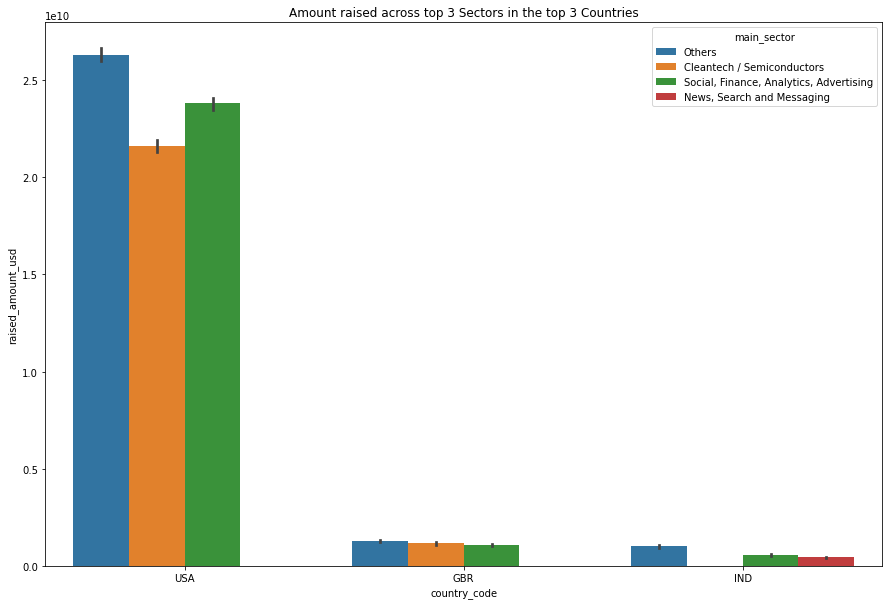

In [93]:
#plotting a barplot showing amount raised across top 3 sectors in top 3 countries
plt.figure(figsize=(15, 10))
plt.title('Amount raised across top 3 Sectors in the top 3 Countries')
sns.barplot(y='raised_amount_usd', x='country_code', hue="main_sector", data=top3, estimator=np.sum)
plt.show()